In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [8]:
# initial research insprations

# https://github.com/gecko984/supervenn
# https://www.conceptdraw.com/How-To-Guide/venn-diagram-maker
# http://bioinformatics.psb.ugent.be/webtools/Venn/
# https://stackoverflow.com/questions/32440128/nice-looking-five-sets-venn-diagrams-in-r
# https://angiogenesis.dkfz.de/oncoexpress/software/sumo/venn.htm
# https://moebio.com/research/sevensets/

# found Edwards-Venn Diagrams, which seem perfect to start with!
# https://happyruin.wordpress.com/2013/03/24/edwards-venn-diagrams/


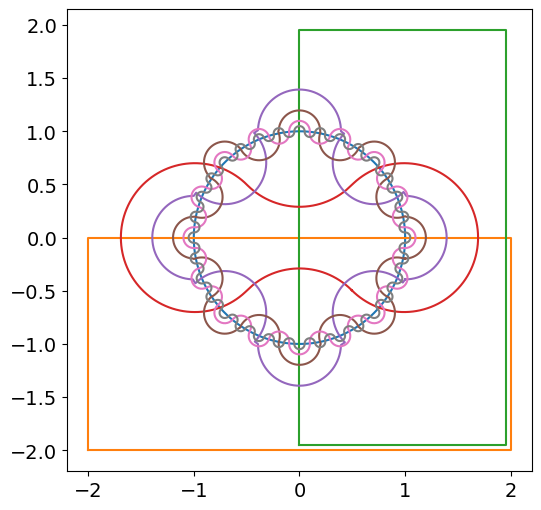

In [126]:
# font size
mpl.rcParams.update({'font.size': 14})

def make_edwards_venn(n, num_points=1000):

    n_1_size = 1
    n_2_size = 2
    n_3_size = 1.95
    n_4_circle_radius = 0.7

    curves = []
    if n >= 1: # circle
        curve = []
        for i in range(num_points):
            theta = 2*np.pi*i/num_points
            x = n_1_size * np.cos(theta)
            y = n_1_size * np.sin(theta)
            curve.append([x, y])
        curve.append(curve[0]) # complete the loop
        curves.append(np.array(curve))
    
    if n >= 2: # top and bottom hemispheres
        num_points_per_segment = num_points // 6
        curve = []
        for i in range(2 * num_points_per_segment):
            curve.append([n_2_size * (-1 + 1 * i / num_points_per_segment), -n_2_size])
        for i in range(num_points_per_segment):
            curve.append([n_2_size, n_2_size * (-1 + i / num_points_per_segment)])
        for i in range(2 * num_points_per_segment):
            curve.append([n_2_size * (1 - 1 * i / num_points_per_segment), 0])
        for i in range(num_points_per_segment):
            curve.append([-n_2_size, -n_2_size * i / num_points_per_segment])
        curve.append(curve[0]) # complete the loop
        curves.append(np.array(curve))

    if n >= 3: # left and right hemispheres
        num_points_per_segment = num_points // 6
        curve = []
        for i in range(num_points_per_segment):
            curve.append([n_3_size * i / num_points_per_segment, -n_3_size])
        for i in range(2 * num_points_per_segment):
            curve.append([n_3_size, n_3_size * (-1 + i / num_points_per_segment)])
        for i in range(num_points_per_segment):
            curve.append([n_3_size * (1 - 1 * i / num_points_per_segment), n_3_size])
        for i in range(2 * num_points_per_segment):
            curve.append([0, n_3_size * (1 - i / num_points_per_segment)])
        curve.append(curve[0])
        curves.append(np.array(curve))

    if n >= 4: # first tennis-ball-like section, handled specially since semi-circles are a bad approximation
        curve = []
        # right circle convex section
        num_points_per_circle = num_points // 2
        for i in range(num_points_per_circle * 3 // 4):
            theta = 5 * np.pi / 4 + 2*np.pi*i/num_points_per_circle
            x = n_4_circle_radius * np.sqrt(2) + n_4_circle_radius * np.cos(theta)
            y = n_4_circle_radius * np.sin(theta)
            curve.append([x, y])
        # top circle concave section
        for i in range(num_points_per_circle // 4):
            theta = -np.pi / 4 + -2*np.pi*i/num_points_per_circle
            x = n_4_circle_radius * np.cos(theta)
            y = n_4_circle_radius * (np.sqrt(2) + np.sin(theta))
            curve.append([x, y])
        # left circle convex section
        for i in range(num_points_per_circle * 3 // 4):
            theta = np.pi / 4 + 2*np.pi*i/num_points_per_circle
            x = -n_4_circle_radius * np.sqrt(2) + n_4_circle_radius * np.cos(theta)
            y = n_4_circle_radius * np.sin(theta)
            curve.append([x, y])
        # bottom circle concave section
        for i in range(num_points_per_circle // 4):
            theta = 3 * np.pi / 4 + -2*np.pi*i/num_points_per_circle
            x = n_4_circle_radius * np.cos(theta)
            y = n_4_circle_radius * (-np.sqrt(2) + np.sin(theta))
            curve.append([x, y])
        curve.append(curve[0])
        curves.append(np.array(curve))
        

    if n >= 5:

        for curr_n in range(5, n+1):

            iteration = curr_n - 5
            num_circles = 8 * 2**iteration

            curve = []
            circle_radius = np.pi / num_circles
            num_points_per_circle = num_points // num_circles
            for j in range(num_circles):
                theta_j = 2*np.pi*j/num_circles
                convex = (j % 2 == 0)

                center_x = np.cos(theta_j)
                center_y = np.sin(theta_j)

                if convex:
                    for i in range(num_points_per_circle):
                        theta = theta_j - np.pi/2 + np.pi*i/num_points_per_circle
                        x = center_x + circle_radius * np.cos(theta)
                        y = center_y + circle_radius * np.sin(theta)
                        curve.append([x, y])
                else:
                    for i in range(num_points_per_circle):
                        theta = theta_j - np.pi/2 - np.pi*i/num_points_per_circle
                        x = center_x + circle_radius * np.cos(theta)
                        y = center_y + circle_radius * np.sin(theta)
                        curve.append([x, y])
            curve.append(curve[0])
            curves.append(np.array(curve))

    return curves



def plot_curves(curves):
    plt.figure(figsize=(6,6))
    for curve in curves:
        plt.plot(curve[:,0], curve[:,1])
    plt.show()

def plot_edwards_venn(n, num_points=1000):
    curves = make_edwards_venn(n, num_points=1000)
    plot_curves(curves)

plot_edwards_venn(8, num_points=1000)

# TODO: maybe adjust the angles to make this smoother, or add a smoothing step to some of the first iterations
